### GPU PROCESSING - COLAB

# Projeto de Data Science aplicado à dataset do Airbnb Rio
## Objetivo: criar um modelo que determine o preço do imóvel (considerando o brasileiro médio comum)

## 1 - Bibliotecas

In [ ]:
import pandas as pd # Manipulação de DataFrames e Series
import pathlib # Navegar entre pastas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## 2 - Importação das bases de dados

In [ ]:
t_o = time.time()

df_airbnb_listagens = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/data/listings.csv.gz")
  
t_f = time.time()

print("Demorou", (round((t_f-t_o)/60, 2)), "minutos para importar os dados")
print("")
display(df_airbnb_listagens)

Demorou 0.04 minutos para importar os dados



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20230328184454,2023-03-29,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.90,4.77,4.65,NaN,f,1,1,0,0,1.86
1,200568,https://www.airbnb.com/rooms/200568,20230328184454,2023-03-29,city scrape,30m of Ipa Beach e fins de semana special price !,"ATENÇÃO, a eletricidade e gás são pagas pelo h...","Praia, restaurantes, boates, centros culturais...",https://a0.muscache.com/pictures/0586b774-3641...,980805,...,4.97,4.95,4.73,NaN,f,6,4,2,0,1.45
2,202778,https://www.airbnb.com/rooms/202778,20230328184454,2023-03-29,city scrape,Best Studio in Rio - Copacabana,If you looking to staying in a beautiful moder...,Besides Copacabana been the most famous touris...,https://a0.muscache.com/pictures/2015102/18eea...,529105,...,4.94,4.85,4.68,NaN,f,3,3,0,0,1.58
3,24480,https://www.airbnb.com/rooms/24480,20230328184454,2023-03-29,city scrape,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/miso/Hosting-...,99249,...,4.90,4.97,4.56,NaN,f,3,3,0,0,0.56
4,203674,https://www.airbnb.com/rooms/203674,20230328184454,2023-03-29,city scrape,"IPANEMA PENTHOUSE,JACUZZI + STUNNING CRISTO VI...",RETRO CHIC IN A TRULY BREATHTAKING SETTING!<br...,Ipanema is almost like a small kingdom set apa...,https://a0.muscache.com/pictures/2421b3ee-0f2e...,999125,...,4.91,4.95,4.44,NaN,f,1,1,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30471,853663542225256426,https://www.airbnb.com/rooms/853663542225256426,20230328184454,2023-03-30,city scrape,Estúdio com vista pro mar,"Na melhor localização da Zona Sul, entre Ipane...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,8819614,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
30472,856533887091045214,https://www.airbnb.com/rooms/856533887091045214,20230328184454,2023-03-29,city scrape,Copacabana Simple Roon,Abrace a simplicidade neste lugar tranquilo e ...,bairro harmonioso e ao mesmo tempo agitado com...,https://a0.muscache.com/pictures/78027e22-eb74...,501178320,...,NaN,NaN,NaN,NaN,t,4,1,3,0,NaN
30473,857066788747699184,https://www.airbnb.com/rooms/857066788747699184,20230328184454,2023-03-29,city scrape,Tabas | Lindo apê 3 qtos- Ipanema | IP0031,"Ipanema é lar da Praia do Arpoador, do Arquipé...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,341887136,...,NaN,NaN,NaN,NaN,t,224,224,0,0,NaN
30474,857078427206886630,https://www.airbnb.com/rooms/857078427206886630,20230328184454,2023-03-29,city scrape,Tabas | Lindo apê 3 qtos- Ipanema | IP0031,"Ipanema é lar da Praia do Arpoador, do Arquipé...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,341887136,...,NaN,NaN,NaN,NaN,t,224,224,0,0,NaN


## 3 - Tratar os Dados (Análise Qualitativa)

1.   Excluir informações não relevantes  
2.   Excluir colunas repetidas ou extremamente parecidadas com outra
3.   Excluir colunas preenchidas com texto livre
4.   Excluir colunas com todos os valores iguais


### 3.1 - Excluir informações não relevantes

Para isso, vamos criar um arquivo em excel com os 1.000 primeiros registros e fazer uma análise qualitativa, olhando as colunas e identificando quais são desnecessárias

In [ ]:
print(list(df_airbnb_listagens.columns))
df_airbnb_listagens.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

Depois da análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:




In [ ]:
# colunas armazena a lista com as colunas que restarão
colunas = ['host_response_time', 'host_response_rate', 
           'host_acceptance_rate', 'host_is_superhost', 
           'neighbourhood_cleansed', 'latitude', 
           'longitude', 'property_type', 
           'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 
           'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 
           'review_scores_rating', 'instant_bookable', 
           'calculated_host_listings_count']


df_airbnb_listagens = df_airbnb_listagens.loc[:, colunas]
print(list(df_airbnb_listagens.columns))
display(df_airbnb_listagens)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count']


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,within an hour,100%,93%,t,Copacabana,-22.965990,-43.179400,Entire condo,Entire home/apt,5,1 bath,2.0,2.0,$350.00,5,264,288,4.69,f,1
1,within an hour,100%,93%,t,Ipanema,-22.985860,-43.194110,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,$100.00,30,59,198,4.80,f,6
2,within an hour,100%,89%,f,Copacabana,-22.965820,-43.177860,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$266.00,3,356,223,4.80,f,3
3,within a few hours,100%,33%,f,Ipanema,-22.984050,-43.201890,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$624.00,3,357,86,4.73,f,3
4,NaN,NaN,0%,f,Ipanema,-22.983350,-43.203060,Entire rental unit,Entire home/apt,5,3 baths,3.0,3.0,"$1,899.00",5,268,48,4.41,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30471,within an hour,83%,100%,f,Copacabana,-22.983060,-43.191270,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$242.00,2,353,0,NaN,f,1
30472,within an hour,100%,83%,f,Copacabana,-22.970586,-43.187855,Private room in rental unit,Private room,1,2.5 shared baths,1.0,1.0,$118.00,1,328,0,NaN,t,4
30473,within a few hours,93%,95%,f,Ipanema,-22.981699,-43.210760,Entire rental unit,Entire home/apt,6,4 baths,3.0,3.0,"$1,126.00",1,341,0,NaN,t,224
30474,within a few hours,93%,95%,f,Ipanema,-22.982641,-43.210242,Entire rental unit,Entire home/apt,6,4 baths,3.0,3.0,"$1,126.00",1,341,0,NaN,t,224


### 3.2 - Tratar valores vazios

In [ ]:
print(df_airbnb_listagens.isnull().sum()) # Mostra a quantidade valores vazios por coluna

host_response_time                4695
host_response_rate                4695
host_acceptance_rate              3733
host_is_superhost                    7
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      41
bedrooms                          1305
beds                               218
price                                0
minimum_nights                       0
availability_365                     0
number_of_reviews                    0
review_scores_rating              7504
instant_bookable                     0
calculated_host_listings_count       0
dtype: int64


Se houver mais de 7.500 linhas vazias na coluna, exclui-se a coluna
(Aproximadamente, 1/4 do total de linhas)

In [ ]:
for coluna in df_airbnb_listagens:
    if df_airbnb_listagens[coluna].isnull().sum() > 7500:
        df_airbnb_listagens = df_airbnb_listagens.drop(coluna, axis=1)
print(df_airbnb_listagens.isnull().sum())

host_response_time                4695
host_response_rate                4695
host_acceptance_rate              3733
host_is_superhost                    7
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      41
bedrooms                          1305
beds                               218
price                                0
minimum_nights                       0
availability_365                     0
number_of_reviews                    0
instant_bookable                     0
calculated_host_listings_count       0
dtype: int64


Confirmando que não existem linhas com valores vazios

In [ ]:
df_airbnb_listagens = df_airbnb_listagens.dropna()

print(df_airbnb_listagens.shape)
print(df_airbnb_listagens.isnull().sum())

(23695, 19)
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
availability_365                  0
number_of_reviews                 0
instant_bookable                  0
calculated_host_listings_count    0
dtype: int64


### Verificar Tipos de Dados em cada coluna
- Precisamos fazer isso porque às vezes o Python está lendo como texto alguma coluna que deveria ser um número, então precisamos corrigir

In [ ]:
print(df_airbnb_listagens.dtypes)
print('-'*60)
print(df_airbnb_listagens.iloc[0])

host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
price                              object
minimum_nights                      int64
availability_365                    int64
number_of_reviews                   int64
instant_bookable                   object
calculated_host_listings_count      int64
dtype: object
------------------------------------------------------------
host_response_time                 within an hour
host_response_rate                           100%
host_acceptance_rate       

Como o preço está identificado como objeto, devemos tratá-lo para transformar em float.

In [ ]:
#price
df_airbnb_listagens['price'] = df_airbnb_listagens['price'].str.replace('$', '')
df_airbnb_listagens['price'] = df_airbnb_listagens['price'].str.replace(',', '')
df_airbnb_listagens['price'] = df_airbnb_listagens['price'].astype(np.float64, copy=False)
print(df_airbnb_listagens.dtypes)

host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
availability_365                    int64
number_of_reviews                   int64
instant_bookable                   object
calculated_host_listings_count      int64
dtype: object


<ipython-input-301-0d93e6d373f2>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



## 4 - Análise Exploratória e Tratar Outliers


- Vamos basicamente olhar feature por feature para:
    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir
    
- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

- Depois vamos analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)

- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

<ipython-input-302-442ff146747b>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-302-442ff146747b>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                                latitude  longitude  accommodates  bedrooms  \
latitude                        1.000000   0.389775     -0.139993 -0.143011   
longitude                       0.389775   1.000000     -0.089998 -0.111819   
accommodates                   -0.139993  -0.089998      1.000000  0.714806   
bedrooms                       -0.143011  -0.111819      0.714806  1.000000   
beds                           -0.073203  -0.086593      0.700461  0.609579   
price                          -0.019255   0.000890      0.062699  0.065653   
minimum_nights                  0.011156   0.014082      0.014507  0.035713   
availability_365                0.052422  -0.101559      0.048276  0.047036   
number_of_reviews              -0.037168   0.080746     -0.008746 -0.056696   
calculated_host_listings_count -0.066112   0.059131      0.126637  0.142896   

                                    beds     price  minimum_nights  \
latitude                       -0.073203 -0.019255        0.

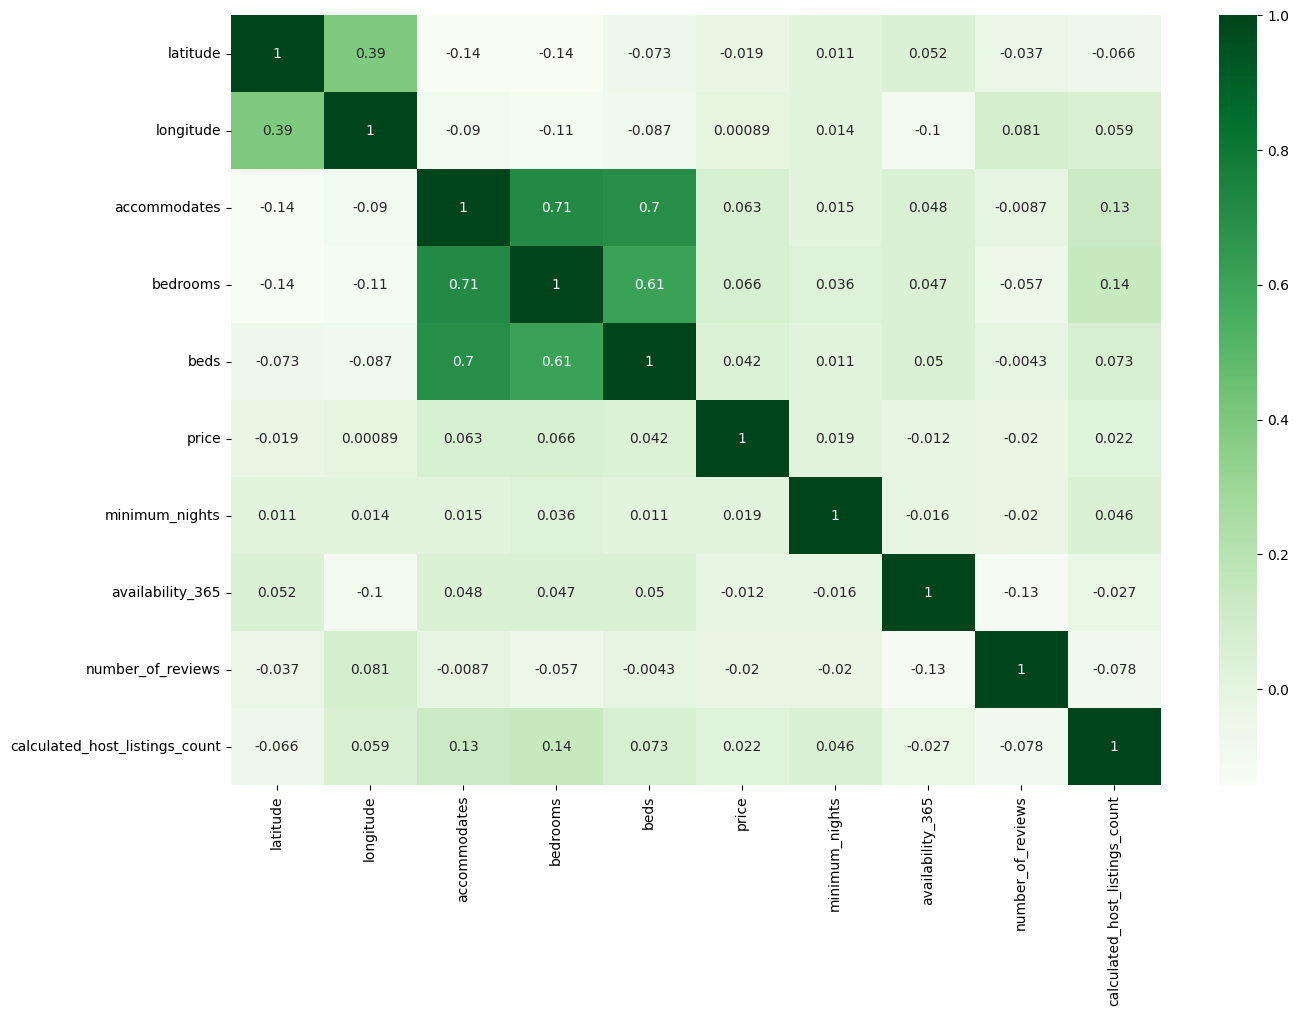

In [ ]:
# Mapa de calor ainda ajuda a confirmar se há duas colunas iguais visto que só pode haver 1 na diagonal principal da matriz (Teria algum 1 aleatório no mapa)

plt.figure(figsize=(15, 10))
sns.heatmap(df_airbnb_listagens.corr(), annot=True, cmap='Greens')
print(df_airbnb_listagens.corr())

Correlação negativa: grandezas inversamente proporcionais

Correlação positiva: grandezas diretamente proporcionais

### Definição de Funções para Análise de Outliers

In [ ]:
# Identificar Outliers

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
    
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [ ]:
# Criação de gráficos

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### **price**

<ipython-input-304-b374c04fade9>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




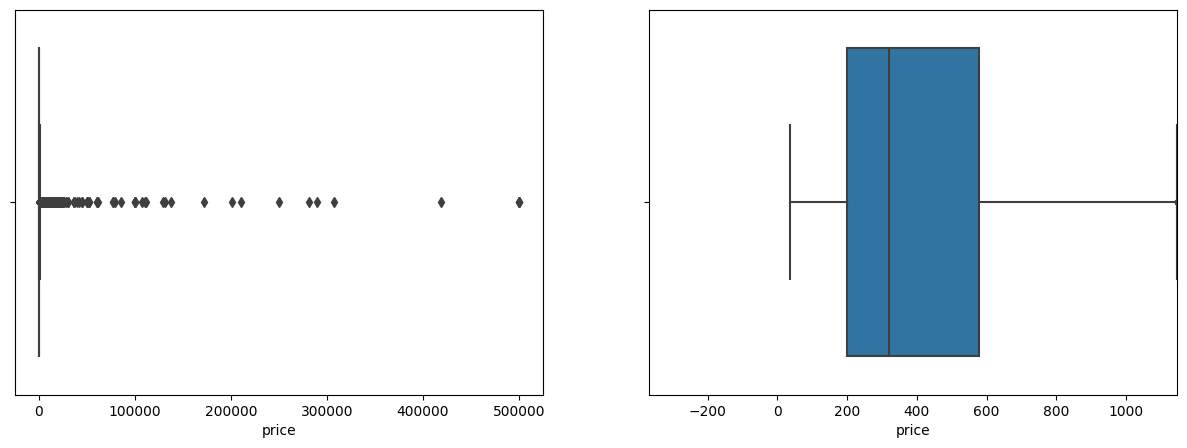

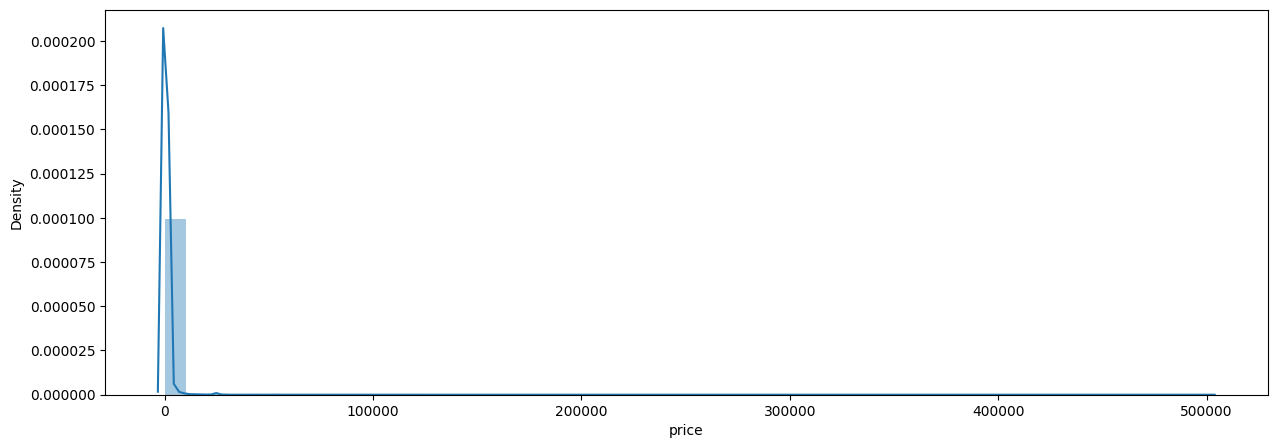

In [ ]:
diagrama_caixa(df_airbnb_listagens['price'])
histograma(df_airbnb_listagens['price'])

Como estamos construindo um modelo para imóveis comuns, valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo principal. Por isso, podemos excluir esses outliers.

In [ ]:
df_airbnb_listagens, linhas_removidas = excluir_outliers(df_airbnb_listagens, 'price')
print('{} linhas removidas'.format(linhas_removidas))

2152 linhas removidas


<ipython-input-304-b374c04fade9>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(21543, 19)


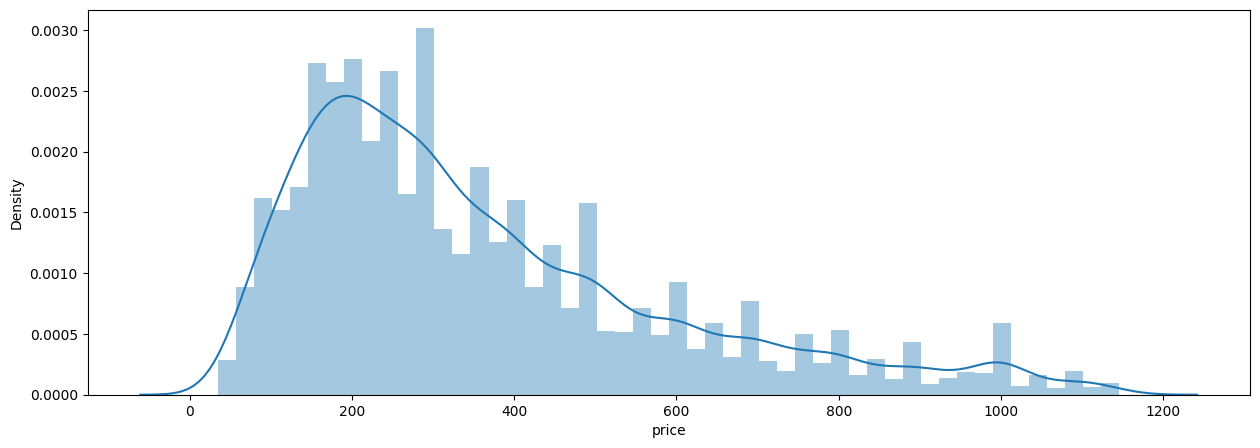

In [ ]:
histograma(df_airbnb_listagens['price'])
print(df_airbnb_listagens.shape)

### **calculated_host_listings_count**

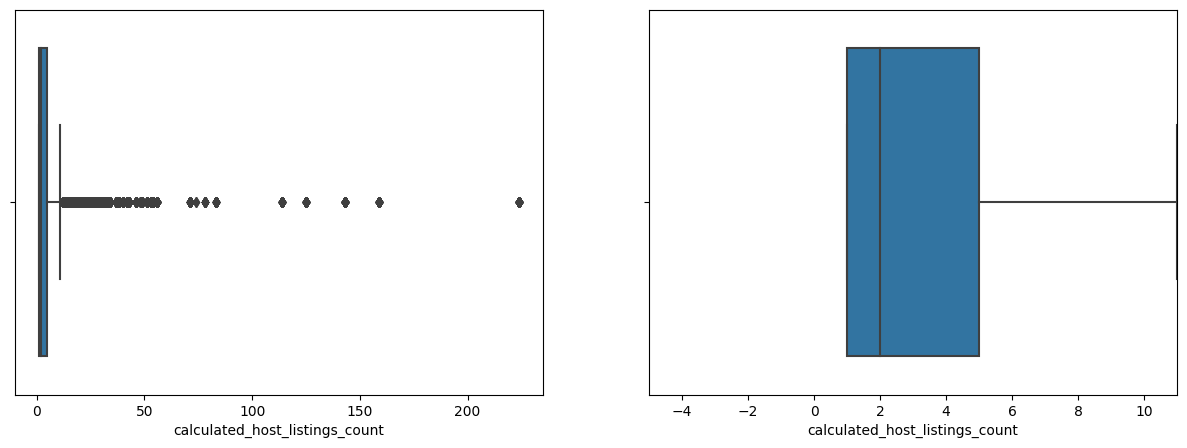

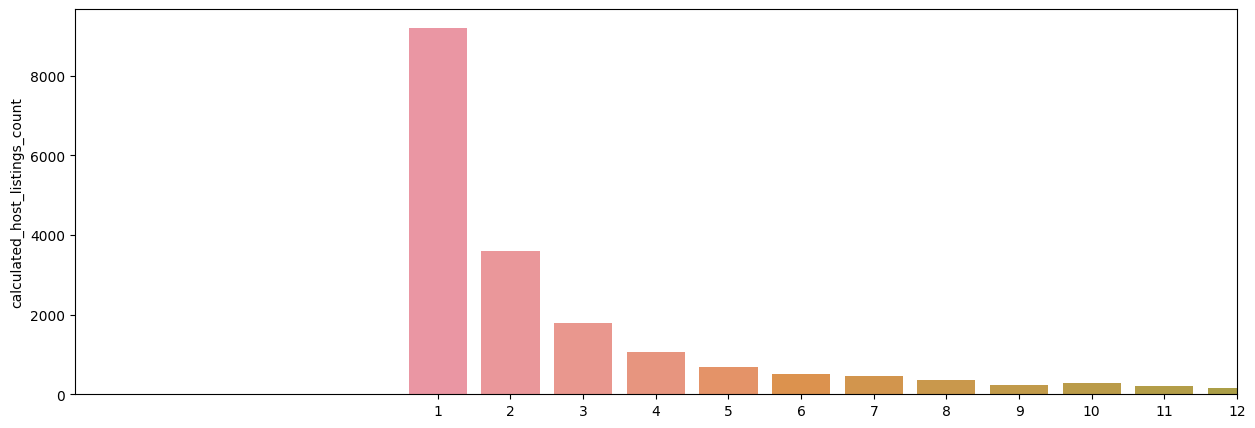

In [ ]:
diagrama_caixa(df_airbnb_listagens['calculated_host_listings_count'])
grafico_barra(df_airbnb_listagens['calculated_host_listings_count'])

Podemos excluir os outliers, porque para o objetivo do nosso projeto hosts com mais de 12 imóveis no airbnb não é o público alvo do objetivo (talvez sejam imobiliários ou profissionais que gerenciam imóveis no airbnb)

In [ ]:
df_airbnb_listagens, linhas_removidas = excluir_outliers(df_airbnb_listagens, 'calculated_host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

3165 linhas removidas


### **minimum_nights**

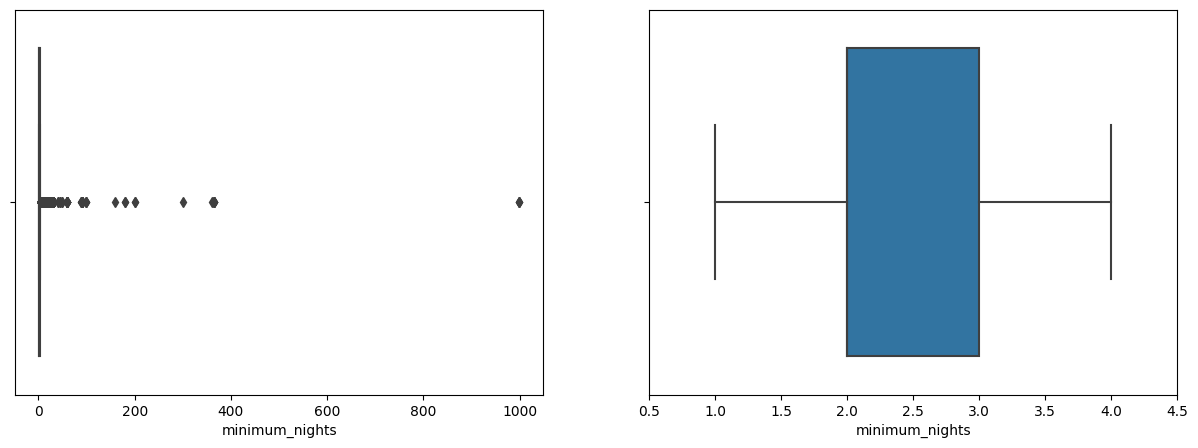

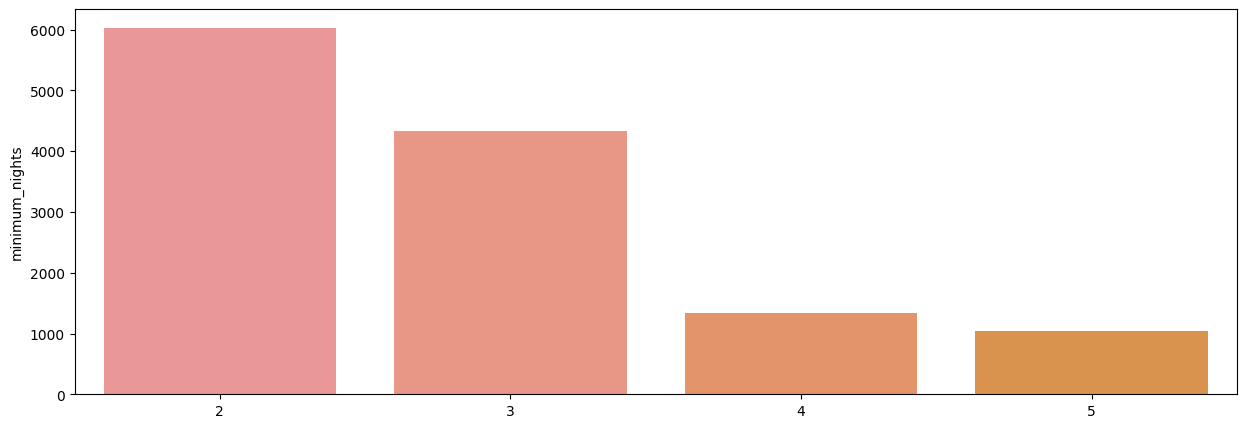

In [ ]:
diagrama_caixa(df_airbnb_listagens['minimum_nights'])
grafico_barra(df_airbnb_listagens['minimum_nights'])

- Aqui temos um motivo talvez até mais forte para excluir esses apartamentos da análise.

- Estamos querendo dados de apartamentos comuns como uma pessoa comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como o "mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar, em que o host exige pelo menos 1 mês no apartamento.

- Por isso, vamos excluir os outliers dessa coluna

In [ ]:
df_airbnb_listagens, linhas_removidas = excluir_outliers(df_airbnb_listagens, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

2142 linhas removidas


### **number_of_reviews**

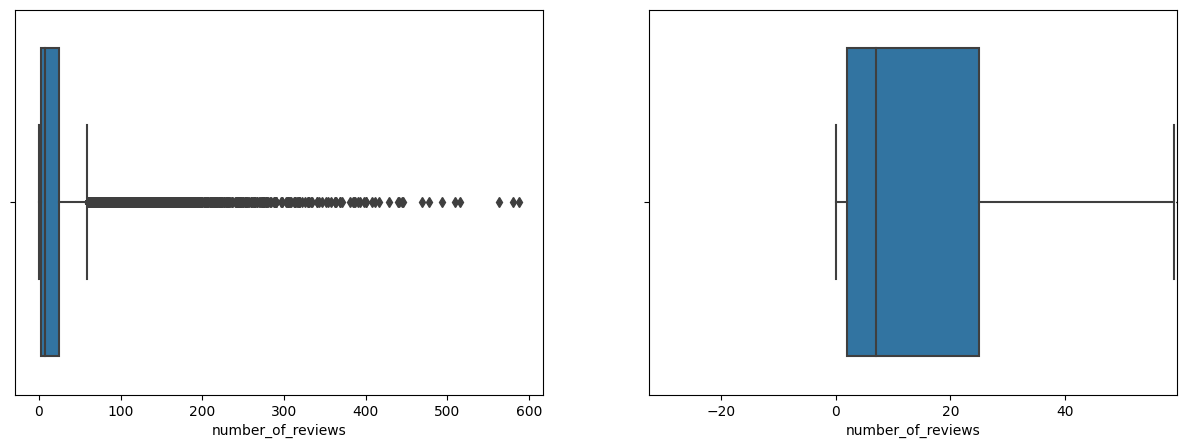

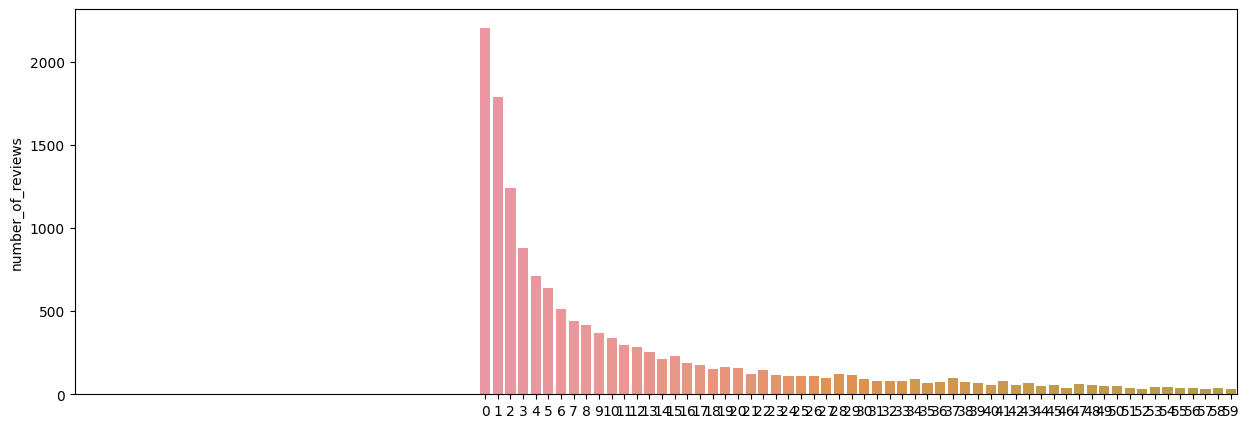

In [ ]:
diagrama_caixa(df_airbnb_listagens['number_of_reviews'])
grafico_barra(df_airbnb_listagens['number_of_reviews'])

- Aqui poderíamos tomar algumas decisões diferentes. Eu vou tomar uma decisão baseado na minha análise pessoal de tirar essa característica da análise, por alguns motivos:

    1. Se excluirmos os outliers, vamos excluir as pessoas que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel). Isso pode impactar muito negativamente o nosso modelo
    2. Pensando no nosso objetivo, se eu tenho um imóvel parado e quero colocar meu imóvel lá, é claro que eu não tenho review nenhuma. Então talvez tirar essa característica da análise pode na verdade acabar ajudando.
    3. Particularmente tenho dúvida se essa característica deveria impactar ou não o preço final

In [ ]:
df_airbnb_listagens = df_airbnb_listagens.drop('number_of_reviews', axis=1)
print(df_airbnb_listagens.shape)
print(df_airbnb_listagens.columns)

(16236, 18)
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365',
       'instant_bookable', 'calculated_host_listings_count'],
      dtype='object')


**accommodates**

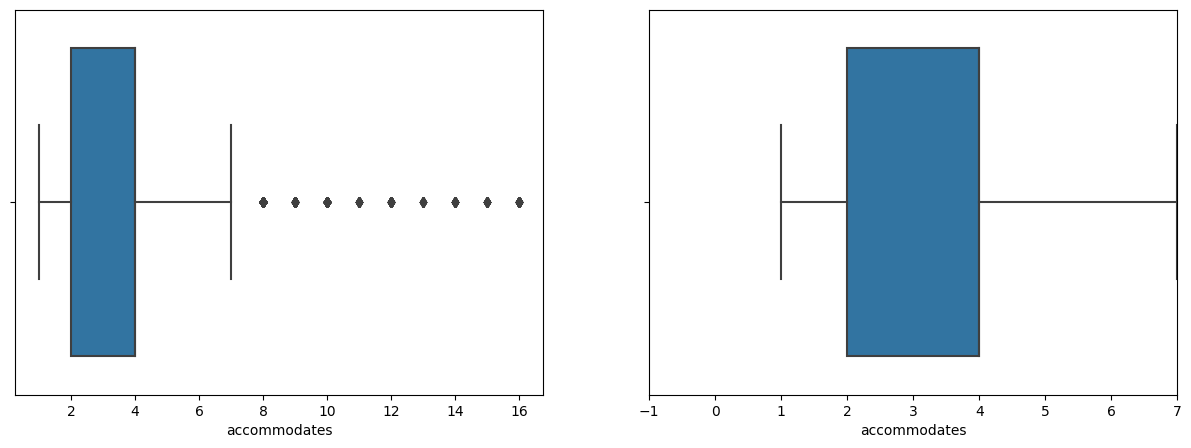

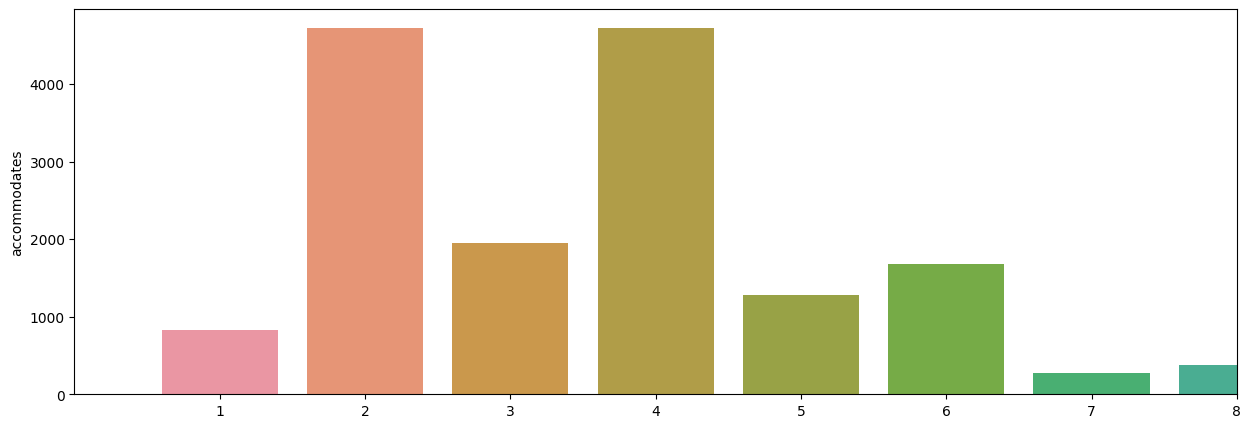

In [ ]:
diagrama_caixa(df_airbnb_listagens['accommodates'])
grafico_barra(df_airbnb_listagens['accommodates'])

Pelo mesmo motivo do "calculated_host_listings_count" vamos excluir os outliers dessa coluna porque apartamentos que acomodam mais de 9 pessoas não são o nosso foco, nosso objetivo aqui é para imóveis comuns.

Caso quiséssemos incluir apartamentos de alto padrão a poderiamos manter essa variável ou então construir um modelo só focado em imóvei com mais de 9 hóspedes

In [ ]:
df_airbnb_listagens, linhas_removidas = excluir_outliers(df_airbnb_listagens, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

774 linhas removidas


## **Tratamento de Colunas de Valores de Texto**

### **bathrooms_text**

In [ ]:
print(df_airbnb_listagens['bathrooms_text'].value_counts())

1 bath               7106
2 baths              2726
1 shared bath        1646
1 private bath       1295
1.5 baths             888
3 baths               473
2.5 baths             391
2 shared baths        321
1.5 shared baths      315
3.5 baths              71
3 shared baths         53
2.5 shared baths       48
4 baths                39
Shared half-bath       12
4 shared baths         12
3.5 shared baths       11
4.5 baths               9
5 baths                 8
0 baths                 7
0 shared baths          7
5 shared baths          5
6 shared baths          4
Half-bath               3
6.5 shared baths        2
7 shared baths          2
4.5 shared baths        2
8 baths                 1
5.5 baths               1
16 baths                1
8 shared baths          1
Private half-bath       1
7 baths                 1
Name: bathrooms_text, dtype: int64


Vamos tratar os dados por regex, dado que são muitos valores

In [ ]:
df_airbnb_listagens['bathrooms_text'] = df_airbnb_listagens['bathrooms_text'].str.extract('(\d+)', expand=False)
print(df_airbnb_listagens.dtypes)
print(df_airbnb_listagens.isnull().sum())

host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
availability_365                    int64
instant_bookable                   object
calculated_host_listings_count      int64
dtype: object
host_response_time                 0
host_response_rate                 0
host_acceptance_rate               0
host_is_superhost                  0
neighbourhood_cleansed             0
latitude                           0
longitud

<ipython-input-317-d60007cf1d64>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



removendo valores nulos

In [ ]:
df_airbnb_listagens = df_airbnb_listagens.dropna()
df_airbnb_listagens['bathrooms'] = df_airbnb_listagens['bathrooms_text'].str.extract('(\d+)', expand=False).astype(np.int64, copy=False)
df_airbnb_listagens = df_airbnb_listagens.drop('bathrooms_text', axis=1)
print(df_airbnb_listagens.shape)
print(df_airbnb_listagens.isnull().sum())

(15446, 18)
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
availability_365                  0
instant_bookable                  0
calculated_host_listings_count    0
bathrooms                         0
dtype: int64


<ipython-input-304-b374c04fade9>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




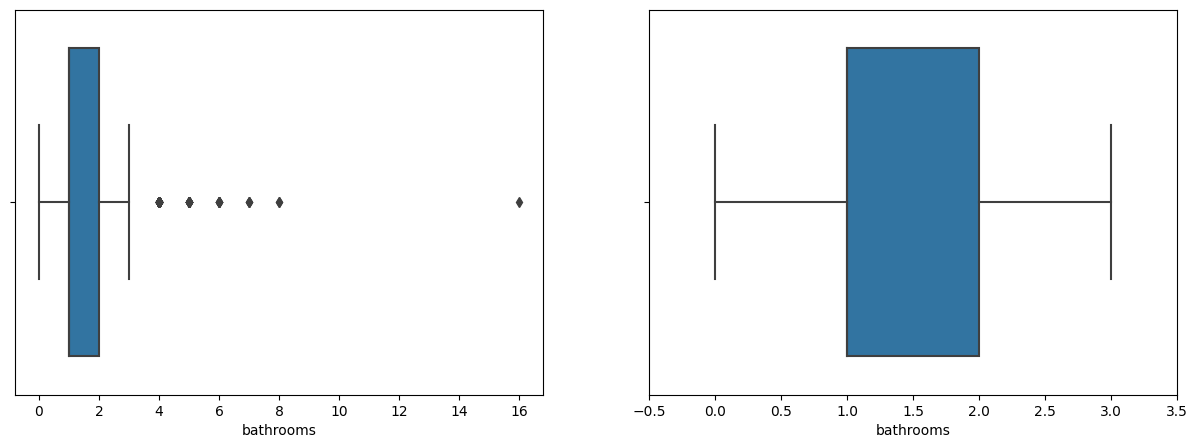

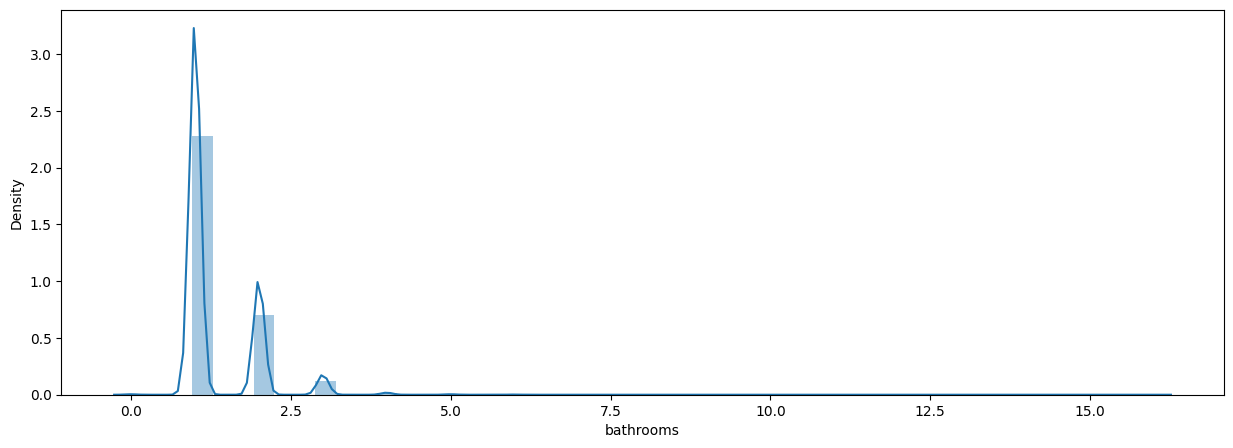

In [ ]:
diagrama_caixa(df_airbnb_listagens['bathrooms'])
histograma(df_airbnb_listagens['bathrooms'])

Removendo outliers

In [ ]:
df_airbnb_listagens, linhas_removidas = excluir_outliers(df_airbnb_listagens, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

88 linhas removidas


### **property_type**

Entire rental unit             8484
Private room in rental unit    2352
Entire condo                   1107
Private room in home            681
Entire loft                     453
                               ... 
Shared room in bungalow           1
Treehouse                         1
Shared room in tiny home          1
Room in bed and breakfast         1
Cycladic home                     1
Name: property_type, Length: 69, dtype: int64


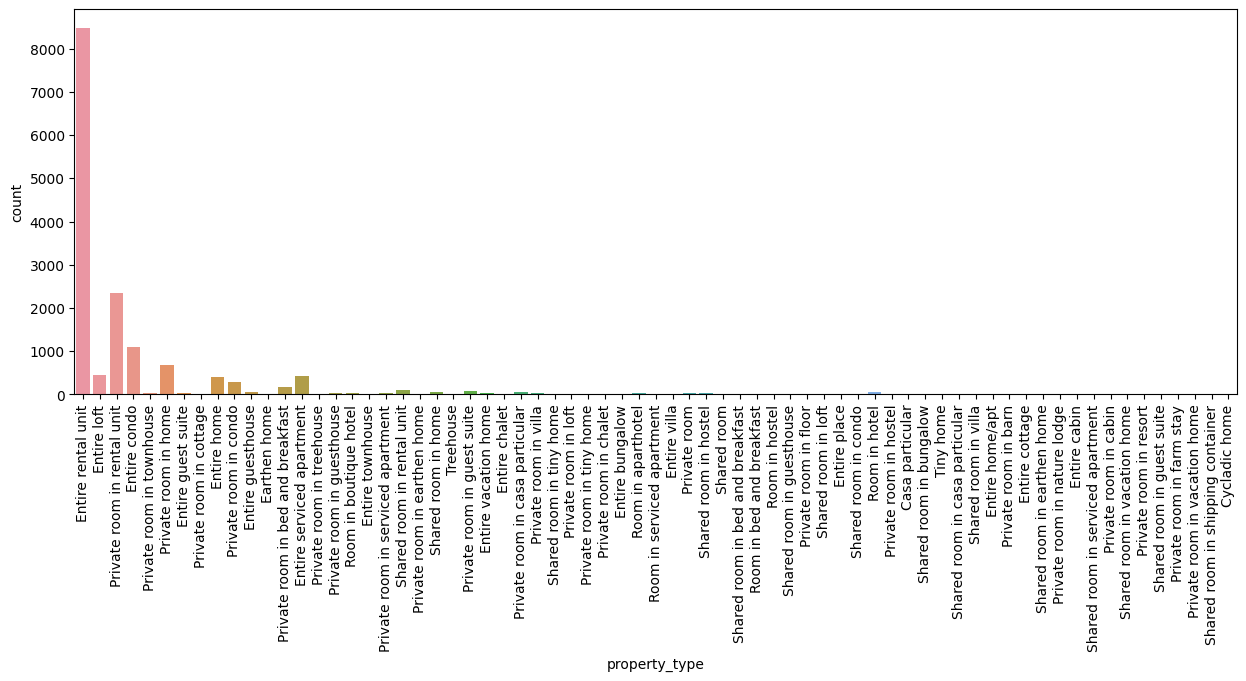

In [ ]:
print(df_airbnb_listagens['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['property_type'])
grafico.tick_params(axis='x', rotation=90)

Aqui a nossa ação não é "excluir outliers", mas sim agrupar valores que são muito pequenos.

Todos os tipos de propriedade que têm menos de 500 propriedades na base de dados, vamos agrupar em um grupo chamado "outros". Isso vai facilitar o nosso modelo

['Entire loft', 'Entire serviced apartment', 'Entire home', 'Private room in condo', 'Private room in bed and breakfast', 'Shared room in rental unit', 'Private room in guest suite', 'Shared room in home', 'Room in hotel', 'Entire guesthouse', 'Private room in casa particular', 'Entire guest suite', 'Private room in serviced apartment', 'Private room in townhouse', 'Private room in villa', 'Private room in guesthouse', 'Shared room in hostel', 'Private room', 'Room in boutique hotel', 'Entire vacation home', 'Room in aparthotel', 'Shared room in bed and breakfast', 'Private room in hostel', 'Tiny home', 'Shared room in condo', 'Private room in loft', 'Entire place', 'Private room in nature lodge', 'Entire villa', 'Casa particular', 'Entire cottage', 'Entire cabin', 'Shared room in loft', 'Room in serviced apartment', 'Entire townhouse', 'Private room in earthen home', 'Room in hostel', 'Entire chalet', 'Earthen home', 'Private room in cottage', 'Private room in tiny home', 'Private roo

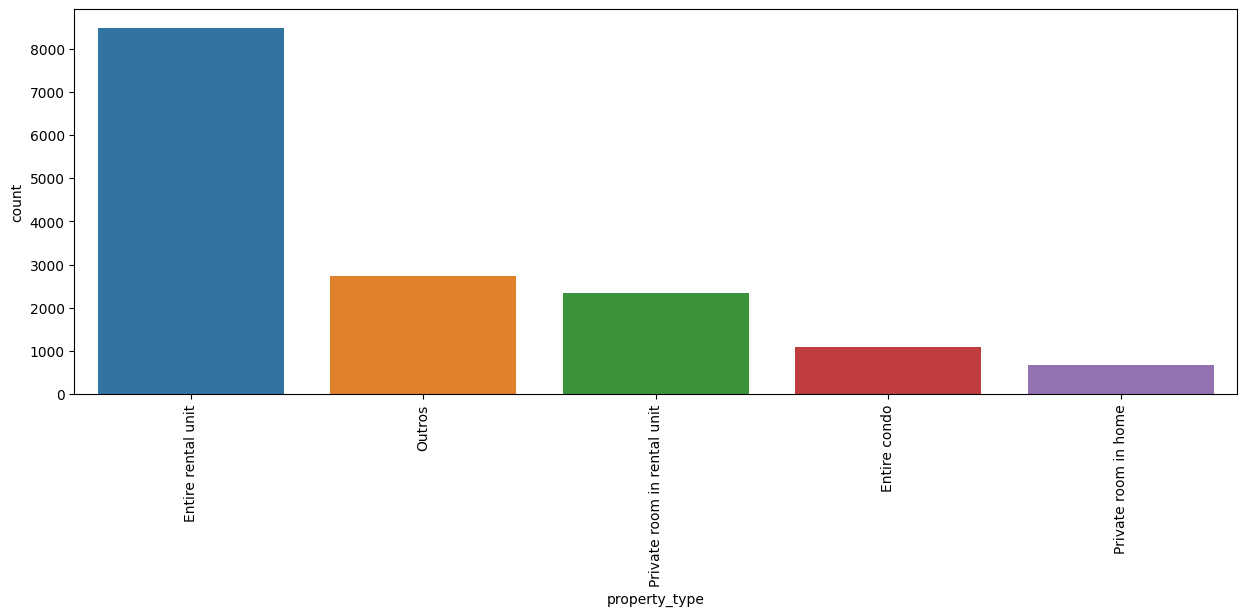

In [ ]:
tabela_tipos_casa = df_airbnb_listagens['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 500:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    df_airbnb_listagens.loc[df_airbnb_listagens['property_type']==tipo, 'property_type'] = 'Outros'

print(df_airbnb_listagens['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['property_type'])
grafico.tick_params(axis='x', rotation=90)

### **room_type**

Entire home/apt    11119
Private room        3954
Shared room          256
Hotel room            29
Name: room_type, dtype: int64


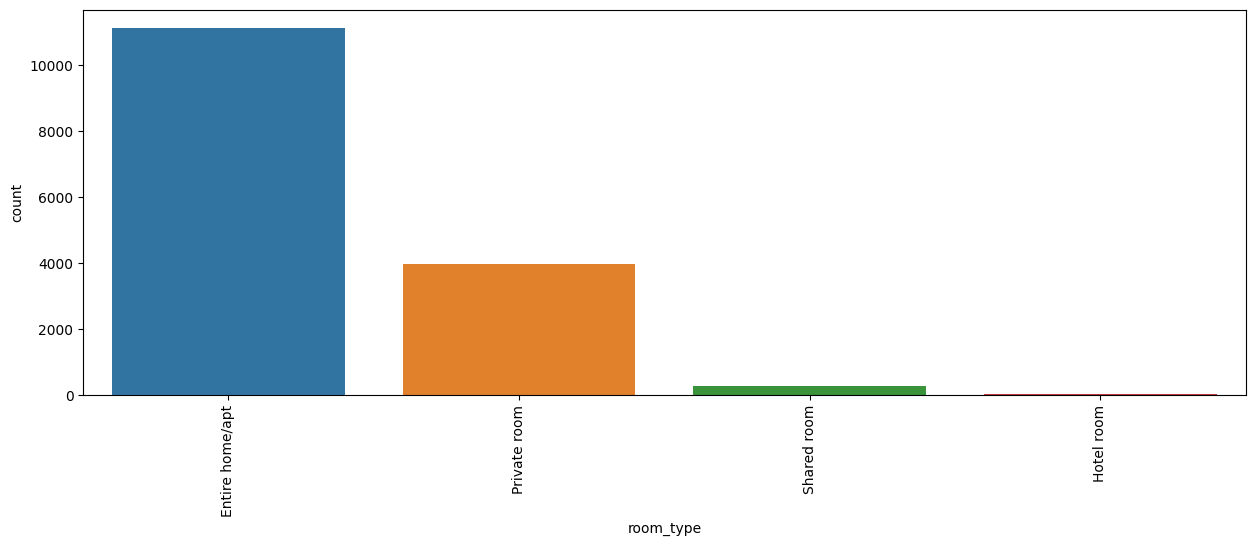

In [ ]:
print(df_airbnb_listagens['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['room_type'])
grafico.tick_params(axis='x', rotation=90)

Em tipo de quarto, não precisamos fazer nada, ele já parece estar bem distribuído

### **host_response_time**

within an hour        9090
within a few hours    3706
within a day          1822
a few days or more     740
Name: host_response_time, dtype: int64


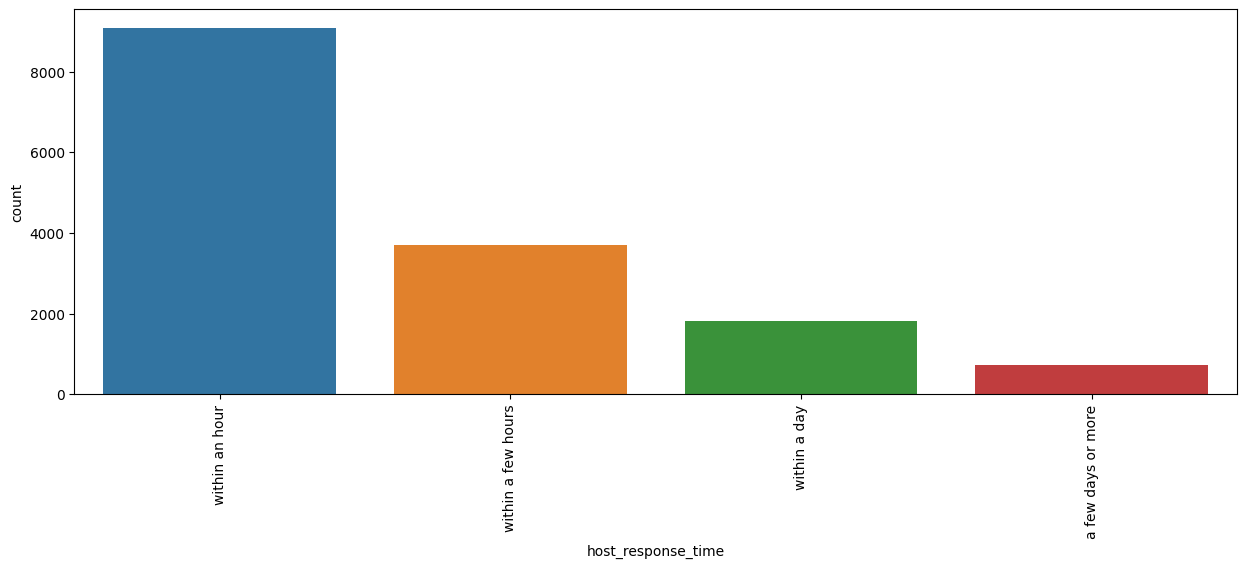

In [ ]:
print(df_airbnb_listagens['host_response_time'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['host_response_time'])
grafico.tick_params(axis='x', rotation=90)

O tempo de resposta do host é dividido em 4 categorias. Como não são muitas, não precisa haver agrupamento

### **neighbourhood_cleansed**

Copacabana                  4661
Barra da Tijuca             1433
Ipanema                     1299
Recreio dos Bandeirantes     816
Botafogo                     779
                            ... 
Manguinhos                     1
Parada de Lucas                1
Guadalupe                      1
Engenho da Rainha              1
Del Castilho                   1
Name: neighbourhood_cleansed, Length: 142, dtype: int64


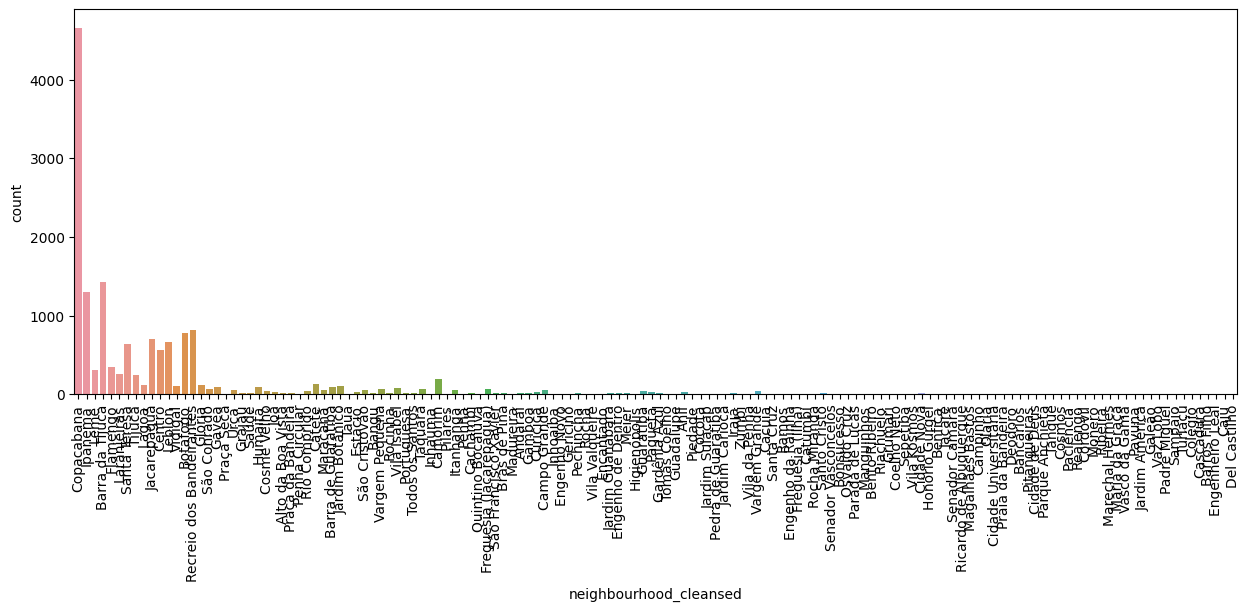

In [ ]:
print(df_airbnb_listagens['neighbourhood_cleansed'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['neighbourhood_cleansed'])
grafico.tick_params(axis='x', rotation=90)

Como são muitas "Vizinhanças", conjuntos com quantidades inferiores a 250 serão agrupados em "Outras"

['Tijuca', 'Camorim', 'Catete', 'Lagoa', 'Glória', 'Vidigal', 'Jardim Botânico', 'Barra de Guaratiba', 'Humaitá', 'Gávea', 'Vila Isabel', 'Taquara', 'São Conrado', 'Vargem Pequena', 'Freguesia (Jacarepaguá)', 'Urca', 'Itanhangá', 'Campo Grande', 'Maracanã', 'São Cristóvão', 'Rio Comprido', 'Vargem Grande', 'Guaratiba', 'Cosme Velho', 'Curicica', 'Estácio', 'Joá', 'Paquetá', 'Anil', 'Jardim Guanabara', 'Pechincha', 'Gardênia Azul', 'Praça da Bandeira', 'Andaraí', 'Méier', 'Grajaú', 'Brás de Pina', 'Alto da Boa Vista', 'Gamboa', 'Todos os Santos', 'Engenho de Dentro', 'Portuguesa', 'Cachambi', 'Irajá', 'Santo Cristo', 'Rocinha', 'Bangu', 'Cidade Nova', 'Saúde', 'São Francisco Xavier', 'Praça Seca', 'Cacuia', 'Cosmos', 'Santa Cruz', 'Madureira', 'Jardim Carioca', 'Vila da Penha', 'Encantado', 'Coelho Neto', 'Pedra de Guaratiba', 'Catumbi', 'Jardim Sulacap', 'Bonsucesso', 'Senador Vasconcelos', 'Engenho Novo', 'Penha', 'Rocha Miranda', 'Bento Ribeiro', 'Cidade Universitária', 'Maria da Gra

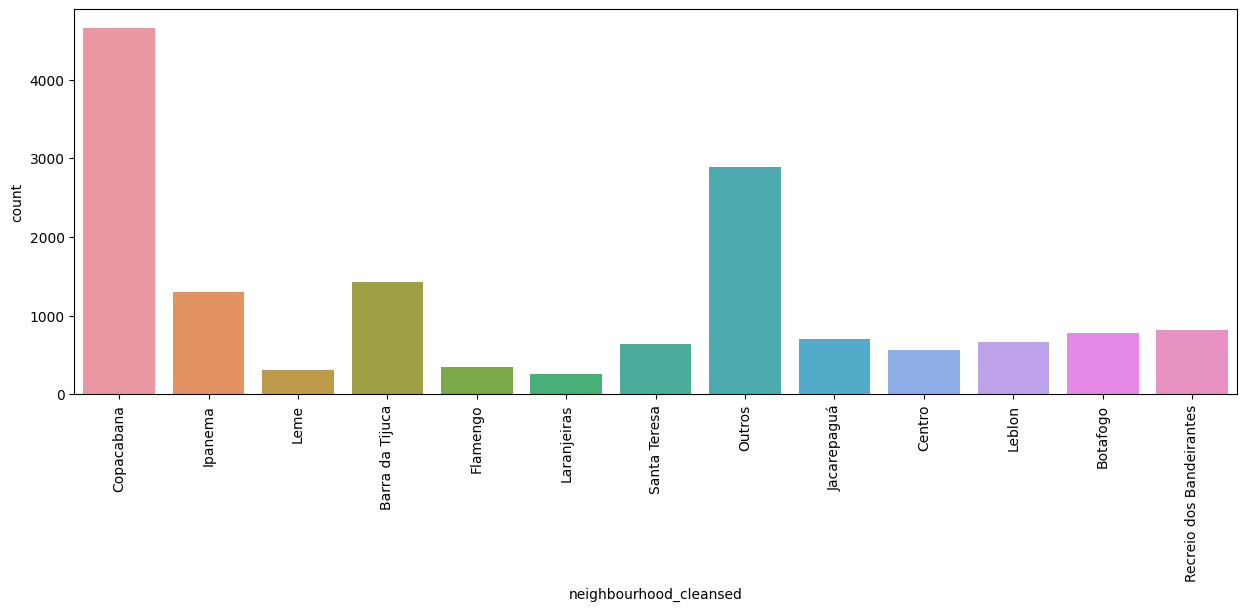

In [ ]:
tabela_vizinhanca = df_airbnb_listagens['neighbourhood_cleansed'].value_counts()
colunas_agrupar = []

for viz in tabela_vizinhanca.index:
    if tabela_vizinhanca[viz] < 250:
        colunas_agrupar.append(viz)
print(colunas_agrupar)

for viz in colunas_agrupar:
    df_airbnb_listagens.loc[df_airbnb_listagens['neighbourhood_cleansed']==viz, 'neighbourhood_cleansed'] = 'Outros'

print(df_airbnb_listagens['neighbourhood_cleansed'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df_airbnb_listagens['neighbourhood_cleansed'])
grafico.tick_params(axis='x', rotation=90)

### **host_response_rate e host_acceptance_rate**

In [ ]:
df_airbnb_listagens['host_response_rate'] = df_airbnb_listagens['host_response_rate'].str.replace('%', '')
df_airbnb_listagens['host_response_rate'] = df_airbnb_listagens['host_response_rate'].str.replace(',', '.')
df_airbnb_listagens['host_response_rate'] = df_airbnb_listagens['host_response_rate'].astype(np.float32, copy=False)
df_airbnb_listagens['host_response_rate'] = df_airbnb_listagens['host_response_rate'] / 100

In [ ]:
df_airbnb_listagens['host_acceptance_rate'] = df_airbnb_listagens['host_acceptance_rate'].str.replace('%', '')
df_airbnb_listagens['host_acceptance_rate'] = df_airbnb_listagens['host_acceptance_rate'].str.replace(',', '.')
df_airbnb_listagens['host_acceptance_rate'] = df_airbnb_listagens['host_acceptance_rate'].astype(np.float32, copy=False)
df_airbnb_listagens['host_acceptance_rate'] = df_airbnb_listagens['host_acceptance_rate'] / 100

### **Visualização de Mapa das Propriedades**

Vamos criar um mapa que exibe nossa base de dados para ver como as propriedades estão distribuídas pela cidade e também identificar os locais de maior preço 

In [ ]:
centro_mapa = {'lat':df_airbnb_listagens.latitude.mean(), 'lon':df_airbnb_listagens.longitude.mean()}
mapa = px.density_mapbox(df_airbnb_listagens, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

## 5 - Encoding


Precisamor Ajustar as features para facilitar as análises futuras (features de categoria, true e false, etc.)

- Features de Valores True ou False, vamos substituir True por 1 e False por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

**Criar Variáveis Dummies (Transformar textos em números)**

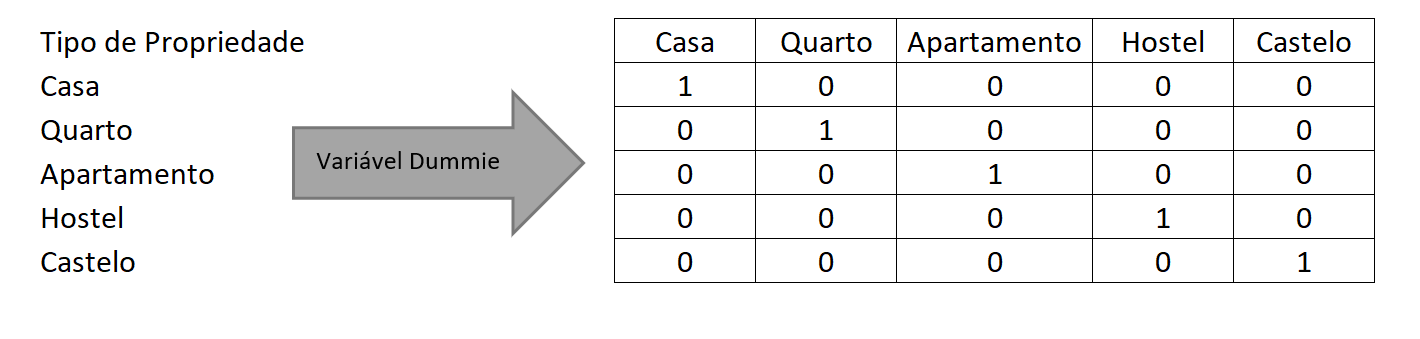

In [ ]:
# Variável Dummie
colunas_categorias = ['property_type', 'room_type','host_response_time', 'neighbourhood_cleansed']
base_airbnb_listagens_cod = df_airbnb_listagens.copy()
base_airbnb_listagens_cod = pd.get_dummies(data=base_airbnb_listagens_cod, columns=colunas_categorias)
display(base_airbnb_listagens_cod.head())

,host_response_rate,host_acceptance_rate,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_Copacabana,neighbourhood_cleansed_Flamengo,neighbourhood_cleansed_Ipanema,neighbourhood_cleansed_Jacarepaguá,neighbourhood_cleansed_Laranjeiras,neighbourhood_cleansed_Leblon,neighbourhood_cleansed_Leme,neighbourhood_cleansed_Outros,neighbourhood_cleansed_Recreio dos Bandeirantes,neighbourhood_cleansed_Santa Teresa
2,1.0,0.89,f,-22.96582,-43.17786,2,1.0,1.0,266.0,3,...,1,0,0,0,0,0,0,0,0,0
3,1.0,0.33,f,-22.98405,-43.20189,2,1.0,1.0,624.0,3,...,0,0,1,0,0,0,0,0,0,0
5,1.0,0.86,t,-22.96392,-43.17263,2,1.0,2.0,236.0,2,...,0,0,0,0,0,0,1,0,0,0
6,1.0,0.58,f,-22.97735,-43.19105,3,1.0,1.0,307.0,3,...,1,0,0,0,0,0,0,0,0,0
7,1.0,0.75,f,-23.00980,-43.37099,4,2.0,2.0,539.0,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Colunas verdadeiros e falsos -> 1 e 0
colunas_tf = ['host_is_superhost', 'instant_bookable']
for coluna in colunas_tf:
  base_airbnb_listagens_cod.loc[base_airbnb_listagens_cod[coluna]=='t', coluna] = 1
  base_airbnb_listagens_cod.loc[base_airbnb_listagens_cod[coluna]=='f', coluna] = 0
display(base_airbnb_listagens_cod.head())

,host_response_rate,host_acceptance_rate,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,neighbourhood_cleansed_Copacabana,neighbourhood_cleansed_Flamengo,neighbourhood_cleansed_Ipanema,neighbourhood_cleansed_Jacarepaguá,neighbourhood_cleansed_Laranjeiras,neighbourhood_cleansed_Leblon,neighbourhood_cleansed_Leme,neighbourhood_cleansed_Outros,neighbourhood_cleansed_Recreio dos Bandeirantes,neighbourhood_cleansed_Santa Teresa
2,1.0,0.89,0,-22.96582,-43.17786,2,1.0,1.0,266.0,3,...,1,0,0,0,0,0,0,0,0,0
3,1.0,0.33,0,-22.98405,-43.20189,2,1.0,1.0,624.0,3,...,0,0,1,0,0,0,0,0,0,0
5,1.0,0.86,1,-22.96392,-43.17263,2,1.0,2.0,236.0,2,...,0,0,0,0,0,0,1,0,0,0
6,1.0,0.58,0,-22.97735,-43.19105,3,1.0,1.0,307.0,3,...,1,0,0,0,0,0,0,0,0,0
7,1.0,0.75,0,-23.00980,-43.37099,4,2.0,2.0,539.0,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(base_airbnb_listagens_cod.dtypes)
print('-'*60)
print(base_airbnb_listagens_cod.iloc[0])

host_response_rate                                 float32
host_acceptance_rate                               float32
host_is_superhost                                   object
latitude                                           float64
longitude                                          float64
accommodates                                         int64
bedrooms                                           float64
beds                                               float64
price                                              float64
minimum_nights                                       int64
availability_365                                     int64
instant_bookable                                    object
calculated_host_listings_count                       int64
bathrooms                                            int64
property_type_Entire condo                           uint8
property_type_Entire rental unit                     uint8
property_type_Outros                                 uin

## 6 - Modelo de Previsão 

Passo a Passo:

6.1 - Métricas de Avaliação do Modelo 

6.2 - Escolha dos Modelos 

6.3 - Treinar Modelo 


- Métricas de Avaliação

Vamos usar aqui o R² que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso seria um ótimo parâmetro para ver o quão bom é nosso modelo <br>
-> Quanto mais próximo de 100%, melhor

Vamos calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso modelo está errando. <br>
-> Quanto menor for o erro, melhor

In [ ]:
def metricas_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    MSE = np.sqrt(mean_squared_error(y_teste, previsao))
    MAE = mean_absolute_error(y_teste, previsao)
    return {nome_modelo: {
                          'R²':round(r2, 2),
                          'MSE':round(MSE, 2),
                          'MAE':round(MAE, 2)
                        }
            }

Esses são alguns dos modelos que existem para fazer previsão de valores numéricos (o que chamamos de regressão). Estamos querendo calcular o preço, portanto, queremos prever um valor numérico.

1. RandomForest
2. LinearRegression
3. Extra Tree

In [ ]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelo_dt = DecisionTreeRegressor()
modelo_svm = SVR()
modelo_gb = GradientBoostingRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          'DecisionTree': modelo_dt,
          'SupportVectorMachines': modelo_svm,
          'ExtraTrees': modelo_et,
          }

y = base_airbnb_listagens_cod['price']
X = base_airbnb_listagens_cod.drop('price', axis=1)

- Separa os dados em treino e teste + Treino do Modelo

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separa as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a prever os preços.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

t0 = time.time()

metricas_modelos = []

for nome_modelo, modelo in modelos.items():
  if nome_modelo == 'SupportVectorMachines':
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    modelo.fit(X_train_scaled, y_train)
    previsao = modelo.predict(X_test_scaled)
    metricas_modelos.append(metricas_modelo(nome_modelo, y_test, previsao))
  else:
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    metricas_modelos.append(metricas_modelo(nome_modelo, y_test, previsao))

tf = time.time()

print("Demorou", (round((tf-t0)/60, 2)), "minutos para treinar os modelos")

Demorou 0.54 minutos para treinar os modelos


### Análise dos Modelos

Percebe-se que o resultado obtido para R² não foi muito bom em nenhum dos modelos usados. Isso indica que a relação entre variáveis não é linear.

Vamos tentar com outros modelos:

In [ ]:
print(previsao)

[206.71818301 277.37061852 429.51250405 ... 274.0676284  258.14680107
 243.67605385]
